# Task 2
### Import libraries and ords_cust_merged.pkl

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
path = r'/Users/ECC/Career Foundry/Anaconda Python CF Exercises'
ords_cust_merged = pd.read_pickle(r'/Users/ECC/Career Foundry/Anaconda Python CF Exercises/02 Data/Prepared Data/ords_cust_merged.pkl')

In [8]:
## Checking

ords_cust_merged.head(25)

,user_id,First_name,Last_name,Gender,STATE,Age,date_joined,Dependents,Marital_status,income,...,Busiest day,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,mean_spending,spending_flag,median_order_days,median_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New customer,12.6,High spender,19.0,NaN,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Most orders,8,New customer,12.6,High spender,19.0,NaN,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,12.6,High spender,19.0,NaN,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Average orders,8,New customer,12.6,High spender,19.0,NaN,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most orders,8,New customer,12.6,High spender,19.0,NaN,both
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New customer,12.6,High spender,19.0,NaN,both
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New customer,12.6,High spender,19.0,NaN,both
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Most orders,8,New customer,12.6,High spender,19.0,NaN,both
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,12.6,High spender,19.0,NaN,both
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Average orders,8,New customer,12.6,High spender,19.0,NaN,both


### Creating subset with data 

In [9]:
df_subset = ords_cust_merged[:1000000]
df_subset.head(10)
df_subset.shape

(1000000, 32)

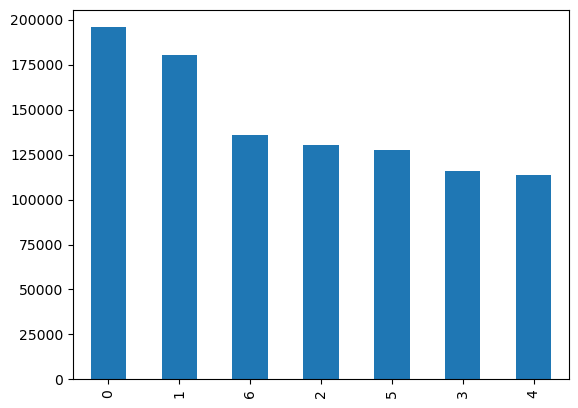

In [10]:
bar_graph = df_subset['orders_day_of_week'].value_counts().plot.bar()

In [11]:
## Where 0 = Saturday, 1=Sunday, 2=Monday, 3=Tuesday and so on
## Visual displays volume from highest to lowest.
## Sat and Sun top performers.
## Tues and Wed are worst.

In [12]:
bar_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Orders_day_of_week.png'))

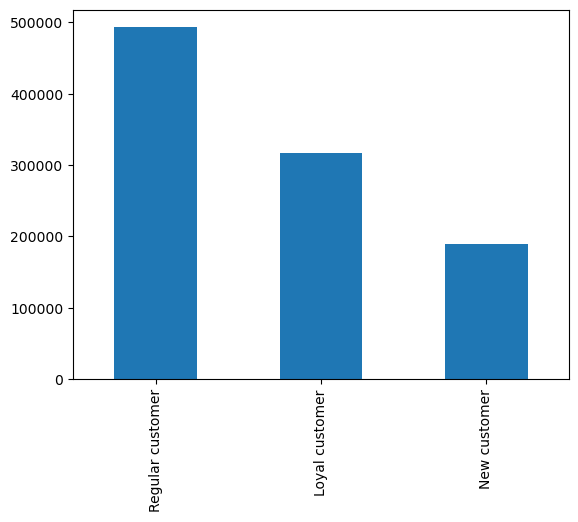

In [13]:
## Create bar graph showing Loyalty values
bar_graph1 = df_subset['loyalty_flag'].value_counts().plot.bar()

In [14]:
bar_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Loyal_customers.png'))

In [15]:
## Marking outlier values as NaN to clear up hist and scatter.

ords_cust_merged.loc[ords_cust_merged['prices'] >100, 'prices'] = np.nan

<Axes: xlabel='prices', ylabel='prices'>

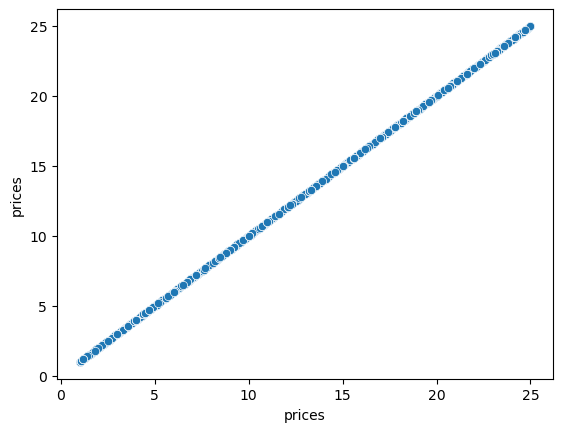

In [16]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_cust_merged)

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [17]:
#create random sample of data to create this line chart
np.random.seed(4)
dev = np.random.rand(len(ords_cust_merged)) <= 0.7


In [18]:
## 'big' stores 70% of the data
big = ords_cust_merged[dev]

In [19]:
## small stores 30% of the data
small = ords_cust_merged[~dev]

In [20]:
len(ords_cust_merged)

32404859

In [21]:
len(big) + len(small)

32404859

In [22]:
df_2 = small[['Busiest_period_of_day','prices']]

In [23]:
df_2.head()


,Busiest_period_of_day,prices
0,Average orders,9.0
2,Most orders,9.0
3,Average orders,12.6
6,Average orders,12.6
10,Most orders,4.3


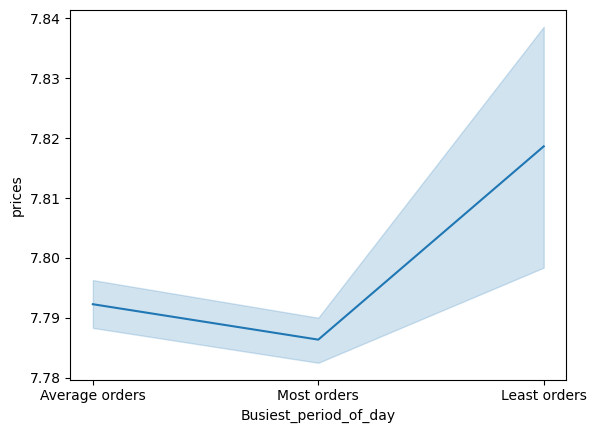

In [24]:
line = sns.lineplot(data = df_2, x = 'Busiest_period_of_day',y = 'prices')

In [25]:
## As with our previous analysis, we see that the busiest periods are filled with lower priced-orders.
## We also saw that our regular customers are the more 'thrifty' ones
## leading us to believe that the least orders placed are due to the higher prices and New customers.

In [27]:
bar_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Orders_Prices.png'))
## Image saved for client.

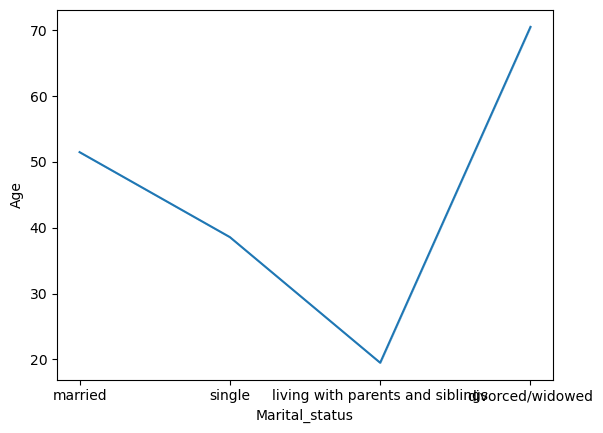

In [29]:
line = sns.lineplot(data = small, x = 'Marital_status',y = 'Age')

In [30]:
## The data point 'living with prents and siblings' should be either corrected or removed. 
## As it is such a small number comparatively, renaming as 'single' would be easiest.

ords_cust_merged['Marital_status'].replace('living with parents and sibling', 'single', inplace=True)

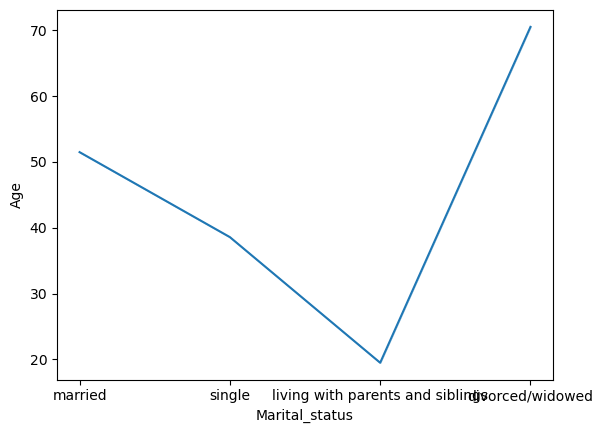

In [33]:
## Re-running above script to check.

line = sns.lineplot(data = small, x = 'Marital_status',y = 'Age')

In [ ]:
## Did not work. Will ask for assistance

In [34]:
## Explore a connection between age and spending power (income).
## To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

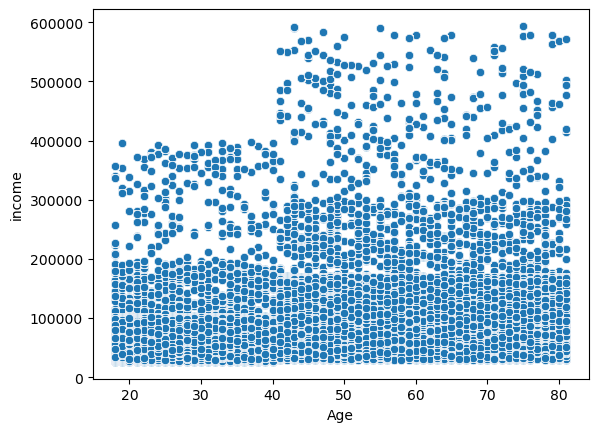

In [36]:
scatter_plot = sns.scatterplot(x = 'Age', y = 'income',data = small)

In [38]:
bar_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Age_Vs_Income.png'))
## Image saved for client.

In [37]:
## There is a correlation between age groups and expendable income.
## Up unto 200000 it is evenly distributed across all age groups.
## Above that, there is a gap until the over-40 age group.
## Data suggests that the older age groups have more expendable income.
